In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [160]:
df = pd.read_csv("seeds_dataset (2).csv")

In [161]:
df.drop(['Unnamed: 8','Unnamed: 9'],axis=1,inplace=True)

In [162]:
df.head()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)"
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [163]:
df.sample(5)

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)"
194,12.11,13.27,0.8639,5.236,2.975,4.132,5.012,3
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
154,11.36,13.05,0.8382,5.175,2.755,4.048,5.263,3
85,18.27,16.09,0.8870,6.173,3.651,2.443,6.197,2
127,17.98,15.85,0.8993,5.979,3.687,2.257,5.919,2


In [164]:
df.columns

Index(['Area', 'Perimeter', 'Compactness', 'Length of kernel',
       'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove',
       'Class (1, 2, 3)'],
      dtype='object')

In [165]:
df.isnull().sum()

Area                       0
Perimeter                  0
Compactness                0
Length of kernel           0
Width of kernel            0
Asymmetry coefficient      0
Length of kernel groove    0
Class (1, 2, 3)            0
dtype: int64

In [166]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
205    False
206    False
207    False
208    False
209    False
Length: 210, dtype: bool

In [167]:
df.describe()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)"
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length of kernel         210 non-null    float64
 4   Width of kernel          210 non-null    float64
 5   Asymmetry coefficient    210 non-null    float64
 6   Length of kernel groove  210 non-null    float64
 7   Class (1, 2, 3)          210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


EXPLORATORY DATA ANANLYSIS

<Axes: ylabel='Frequency'>

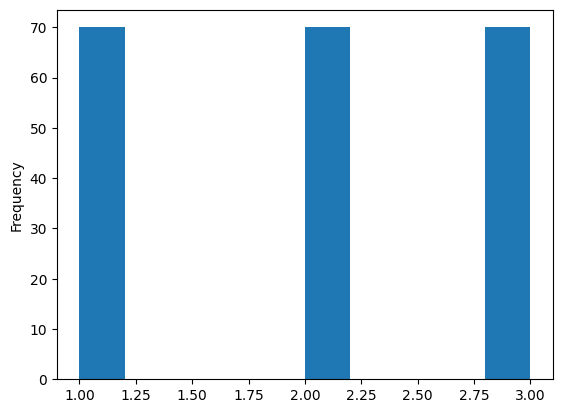

In [169]:
df['Class (1, 2, 3)'].plot(kind='hist')

we see that the dependent feature is balanced

C:\Users\Pulashya\AppData\Local\Temp\ipykernel_16164\2480896593.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[feat],color='purple')
c:\Users\Pulashya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pulashya\AppData\Local\Temp\ipykernel_16164\2480896593.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displo

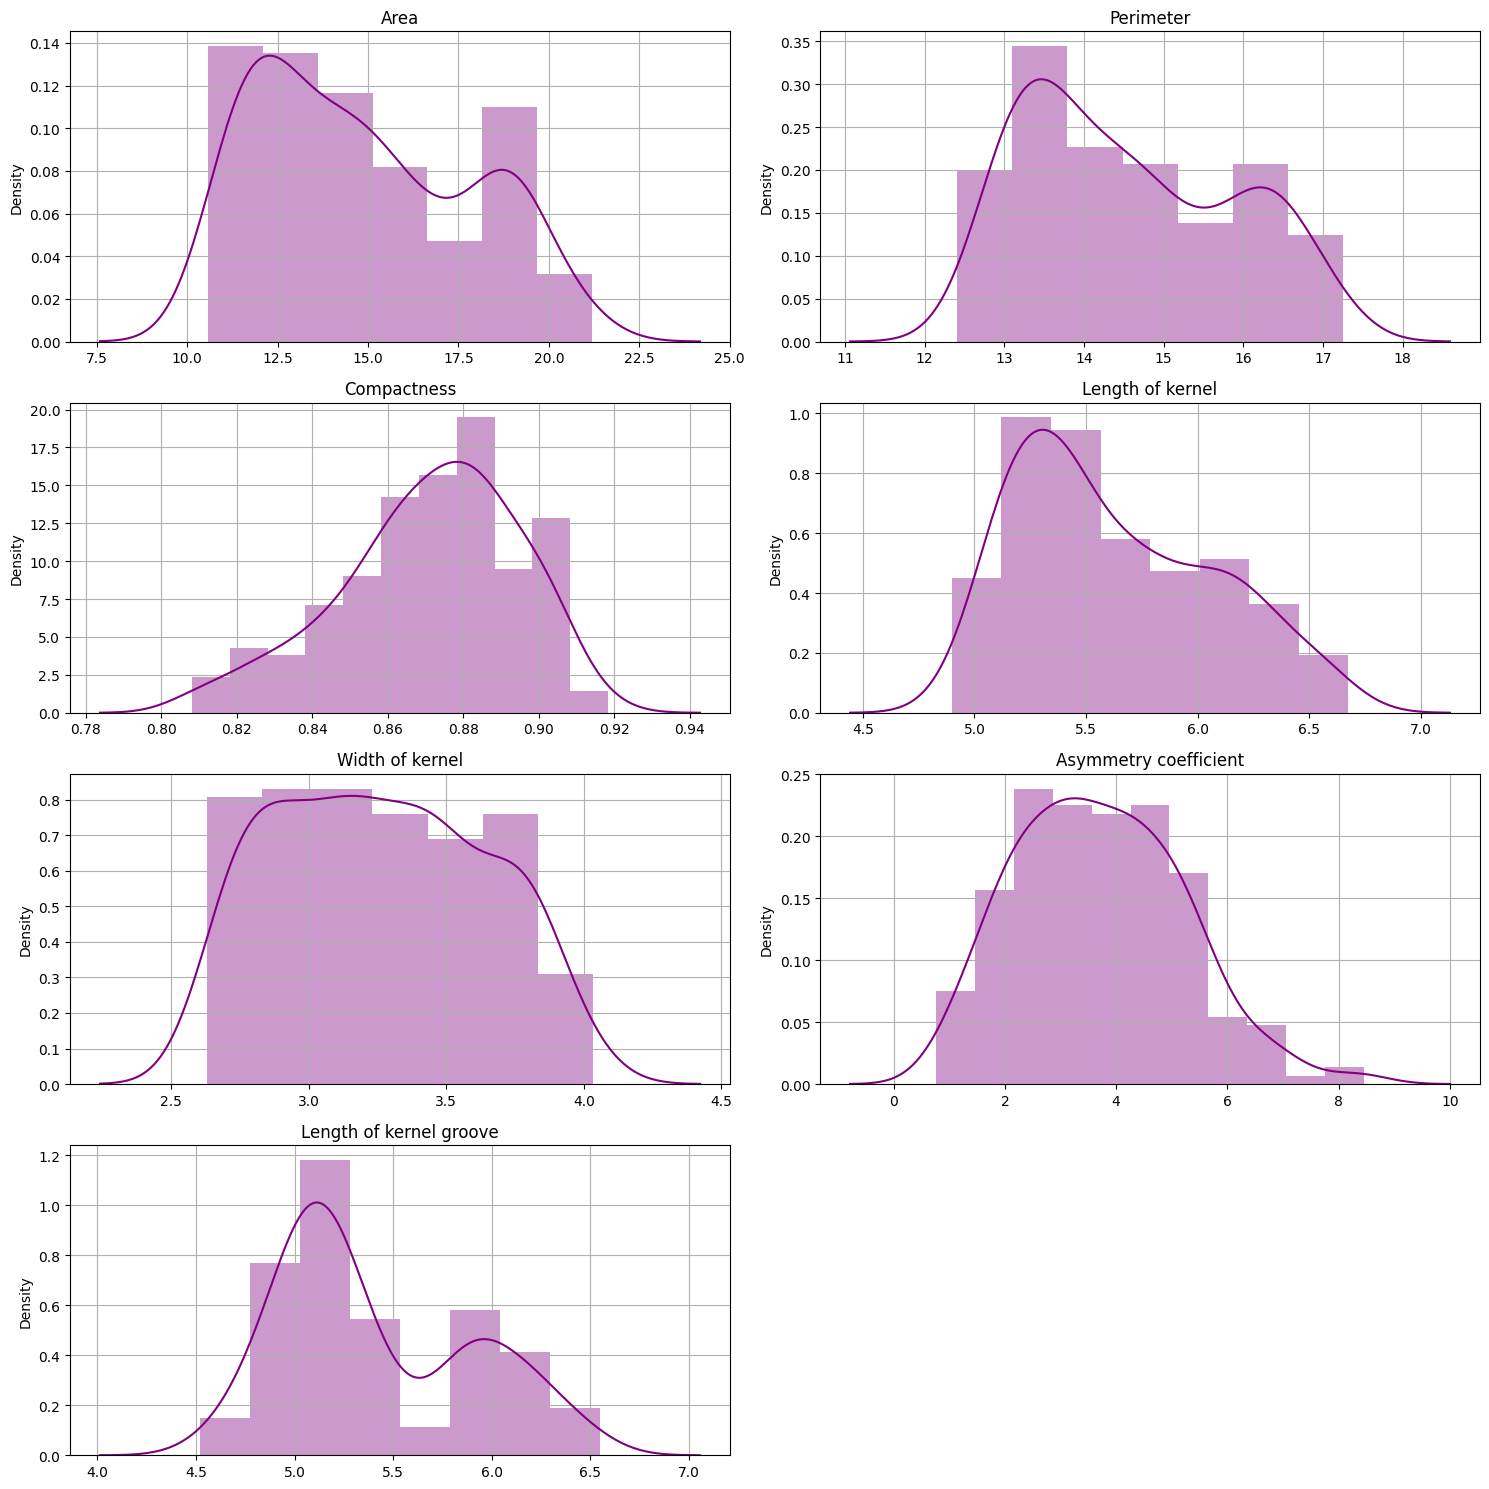

In [170]:
# distribution plot for independent variables
plt.figure(figsize=(15,15),facecolor='white')
i=1
for feat in df.columns:
    if(i<8):
        plt.subplot(4,2,i)
        sns.distplot(x=df[feat],color='purple')
        plt.title(feat)
        plt.grid()
    i+=1
plt.tight_layout()


<Axes: xlabel='Area', ylabel='Length of kernel'>

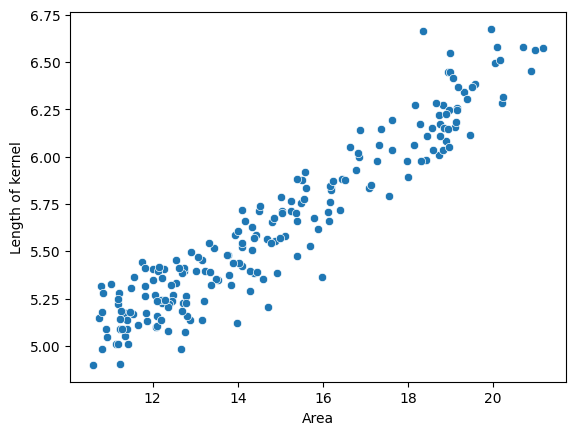

In [171]:
sns.scatterplot(x=df['Area'],y=df['Length of kernel'])

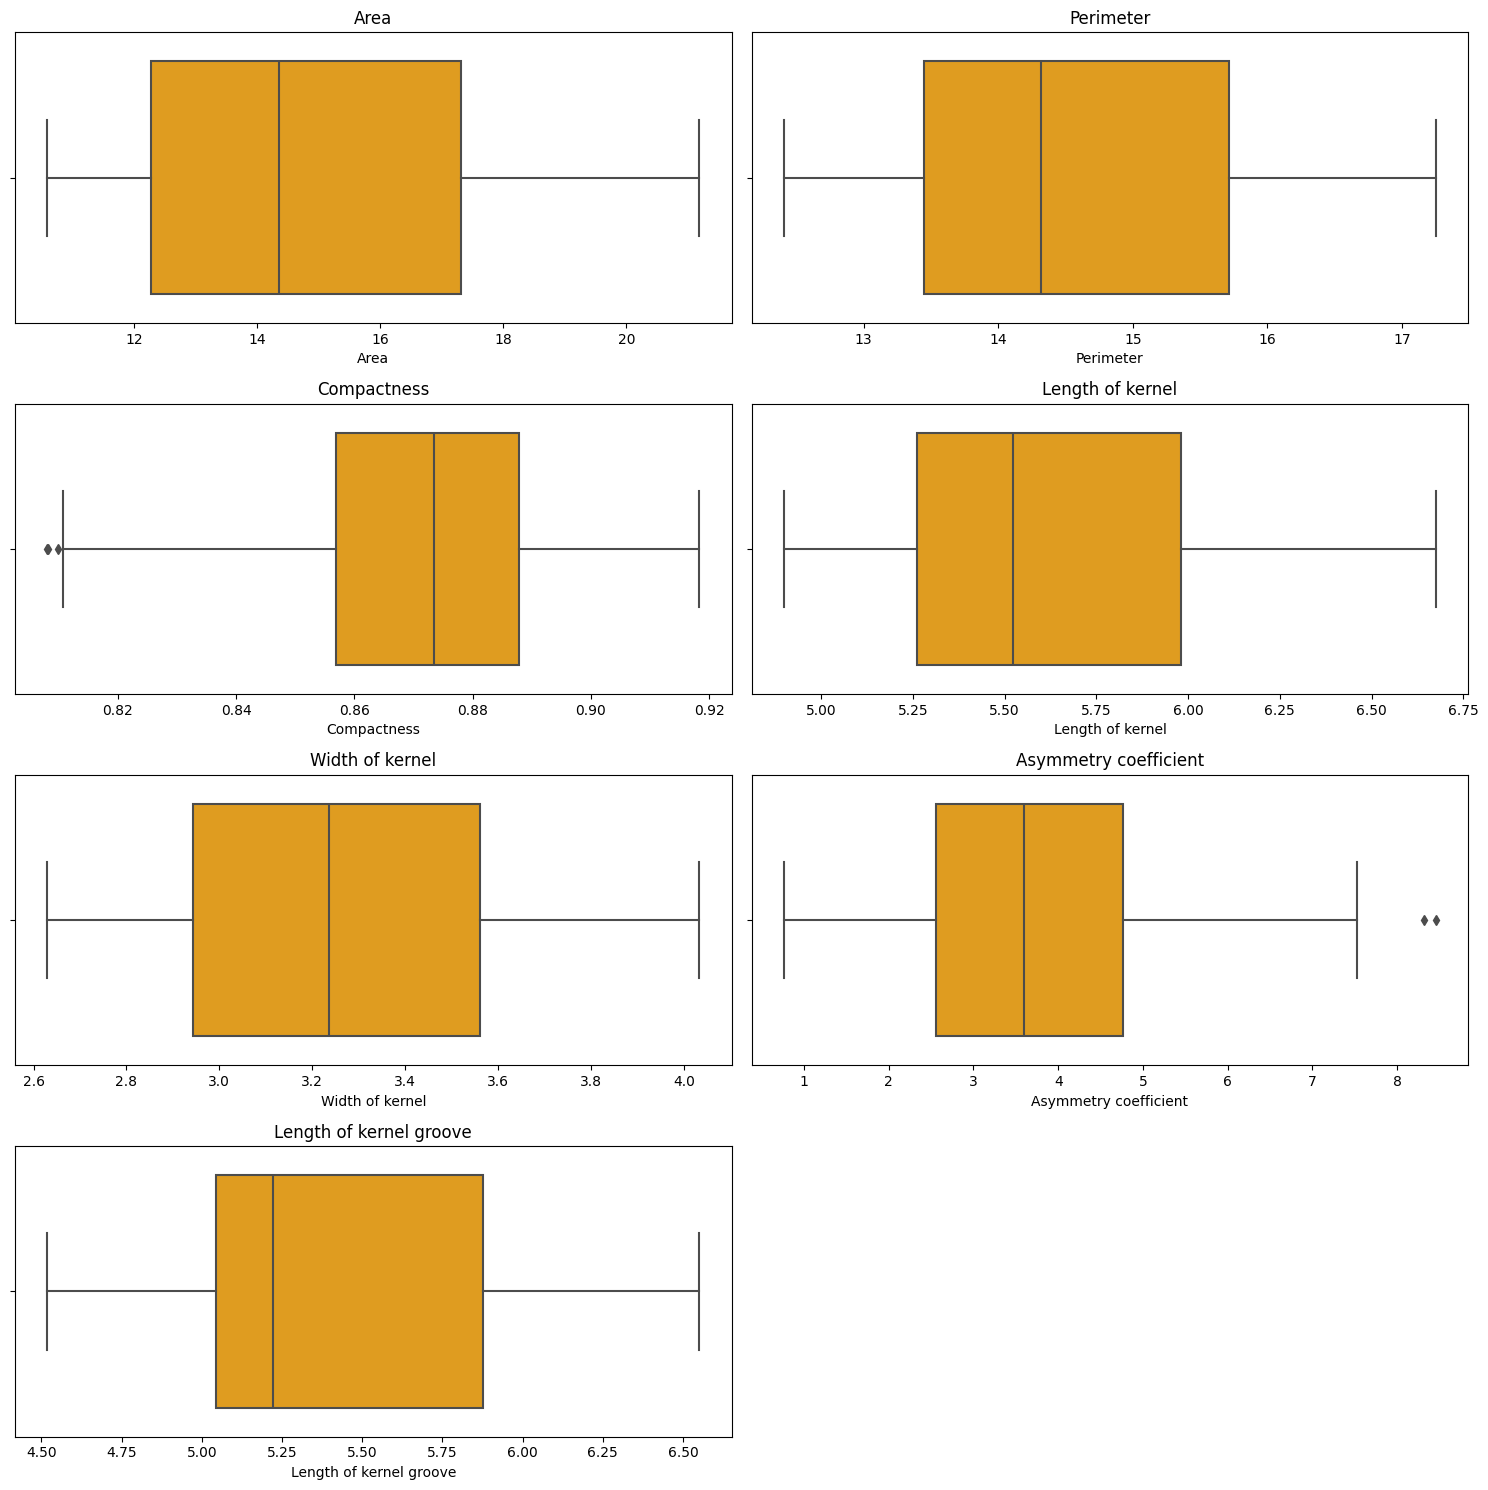

In [172]:
# outlier detection
plt.figure(figsize=(15,15),facecolor='white')
i=1
for feat in df.columns:
    if(i<8):
        plt.subplot(4,2,i)
        sns.boxplot(x=df[feat],color='orange')
        plt.title(feat)
    i+=1
plt.tight_layout()


we see that compactness and Asymmetry coefficient have a few outlier on one side of the graph

FEATURE ENGINEEERING

In [173]:
Q1 = df['Compactness'].quantile(0.25)
Q3 = df['Compactness'].quantile(0.75)

In [174]:
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [175]:
df = df[(df['Compactness'] >= lower_bound) & (df['Compactness'] <= upper_bound)]

<Axes: >

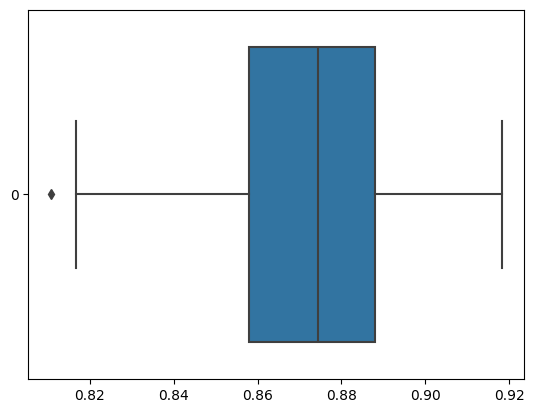

In [176]:
sns.boxplot(df['Compactness'],orient='h')

In [177]:
Q1 = df['Asymmetry coefficient'].quantile(0.25)
Q3 = df['Asymmetry coefficient'].quantile(0.75)

In [178]:
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [179]:
df = df[(df['Asymmetry coefficient'] >= lower_bound) & (df['Asymmetry coefficient'] <= upper_bound)]

<Axes: >

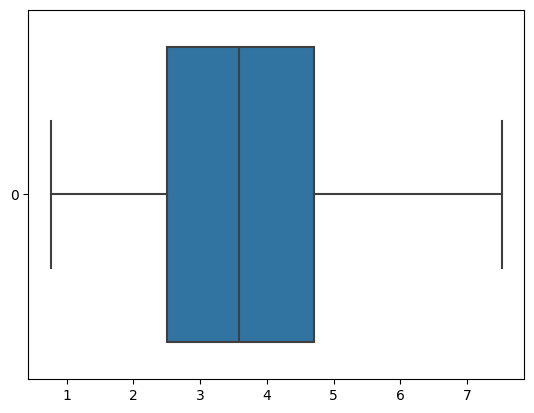

In [180]:
sns.boxplot(df['Asymmetry coefficient'],orient='h')

In [181]:
X = df.drop(('Class (1, 2, 3)'),axis=1)
y = df['Class (1, 2, 3)']

print('X shape=', X.shape)
print('y shape=', y.shape)

X shape= (205, 7)
y shape= (205,)


In [182]:
X.head()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [183]:
correlation_matrix = X.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                             Area  Perimeter  Compactness  Length of kernel  \
Area                     1.000000   0.994766     0.609324          0.951749   
Perimeter                0.994766   1.000000     0.534263          0.972939   
Compactness              0.609324   0.534263     1.000000          0.374816   
Length of kernel         0.951749   0.972939     0.374816          1.000000   
Width of kernel          0.971892   0.947829     0.759171          0.865933   
Asymmetry coefficient   -0.210483  -0.195361    -0.361697         -0.144711   
Length of kernel groove  0.866335   0.891837     0.232121          0.932666   

                         Width of kernel  Asymmetry coefficient  \
Area                            0.971892              -0.210483   
Perimeter                       0.947829              -0.195361   
Compactness                     0.759171              -0.361697   
Length of kernel                0.865933              -0.144711   
Width of ker

In [184]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [185]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors:")
print(vif_data)


Variance Inflation Factors:
                   feature           VIF
0                     Area   5315.269077
1                Perimeter  20680.086863
2              Compactness   5890.811620
3         Length of kernel   8055.319094
4          Width of kernel   7952.354384
5    Asymmetry coefficient      9.885072
6  Length of kernel groove   1304.723189


We will now build our model , we will apply PCA to tackle the high multicollinearity between 
our independent features and also apply standard scaling all using the pipelines

MODEL BUILDING

In [186]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values by imputing with the mean
    ('yeo_johnson', PowerTransformer(method='yeo-johnson')),  # Apply Yeo-Johnson transformation
    ('scaler', StandardScaler()),  # Standardize the features
    ('pca', PCA(n_components=0.95)),  # Apply PCA to retain 95% of variance
    ('classifier', RandomForestClassifier())  # Add your classifier here
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           1       1.00      0.85      0.92        13
           2       1.00      1.00      1.00        12
           3       0.89      1.00      0.94        16

    accuracy                           0.95        41
   macro avg       0.96      0.95      0.95        41
weighted avg       0.96      0.95      0.95        41



Hyperparametertuning and saving model as pickle file

In [187]:
from sklearn.model_selection import GridSearchCV
import pickle

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [None, 10, 20],
    # Add other hyperparameters for your classifier here
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Save the best model as a pickle file
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 9 candidates, totalling 45 fits
              precision    recall  f1-score   support

           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00        12
           3       0.94      0.94      0.94        16

    accuracy                           0.95        41
   macro avg       0.95      0.95      0.95        41
weighted avg       0.95      0.95      0.95        41



this is the normalized distribution of our independent features before and after yeo johnson transformation

C:\Users\Pulashya\AppData\Local\Temp\ipykernel_16164\2425514793.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],color='purple')
c:\Users\Pulashya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pulashya\AppData\Local\Temp\ipykernel_16164\2425514793.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displ

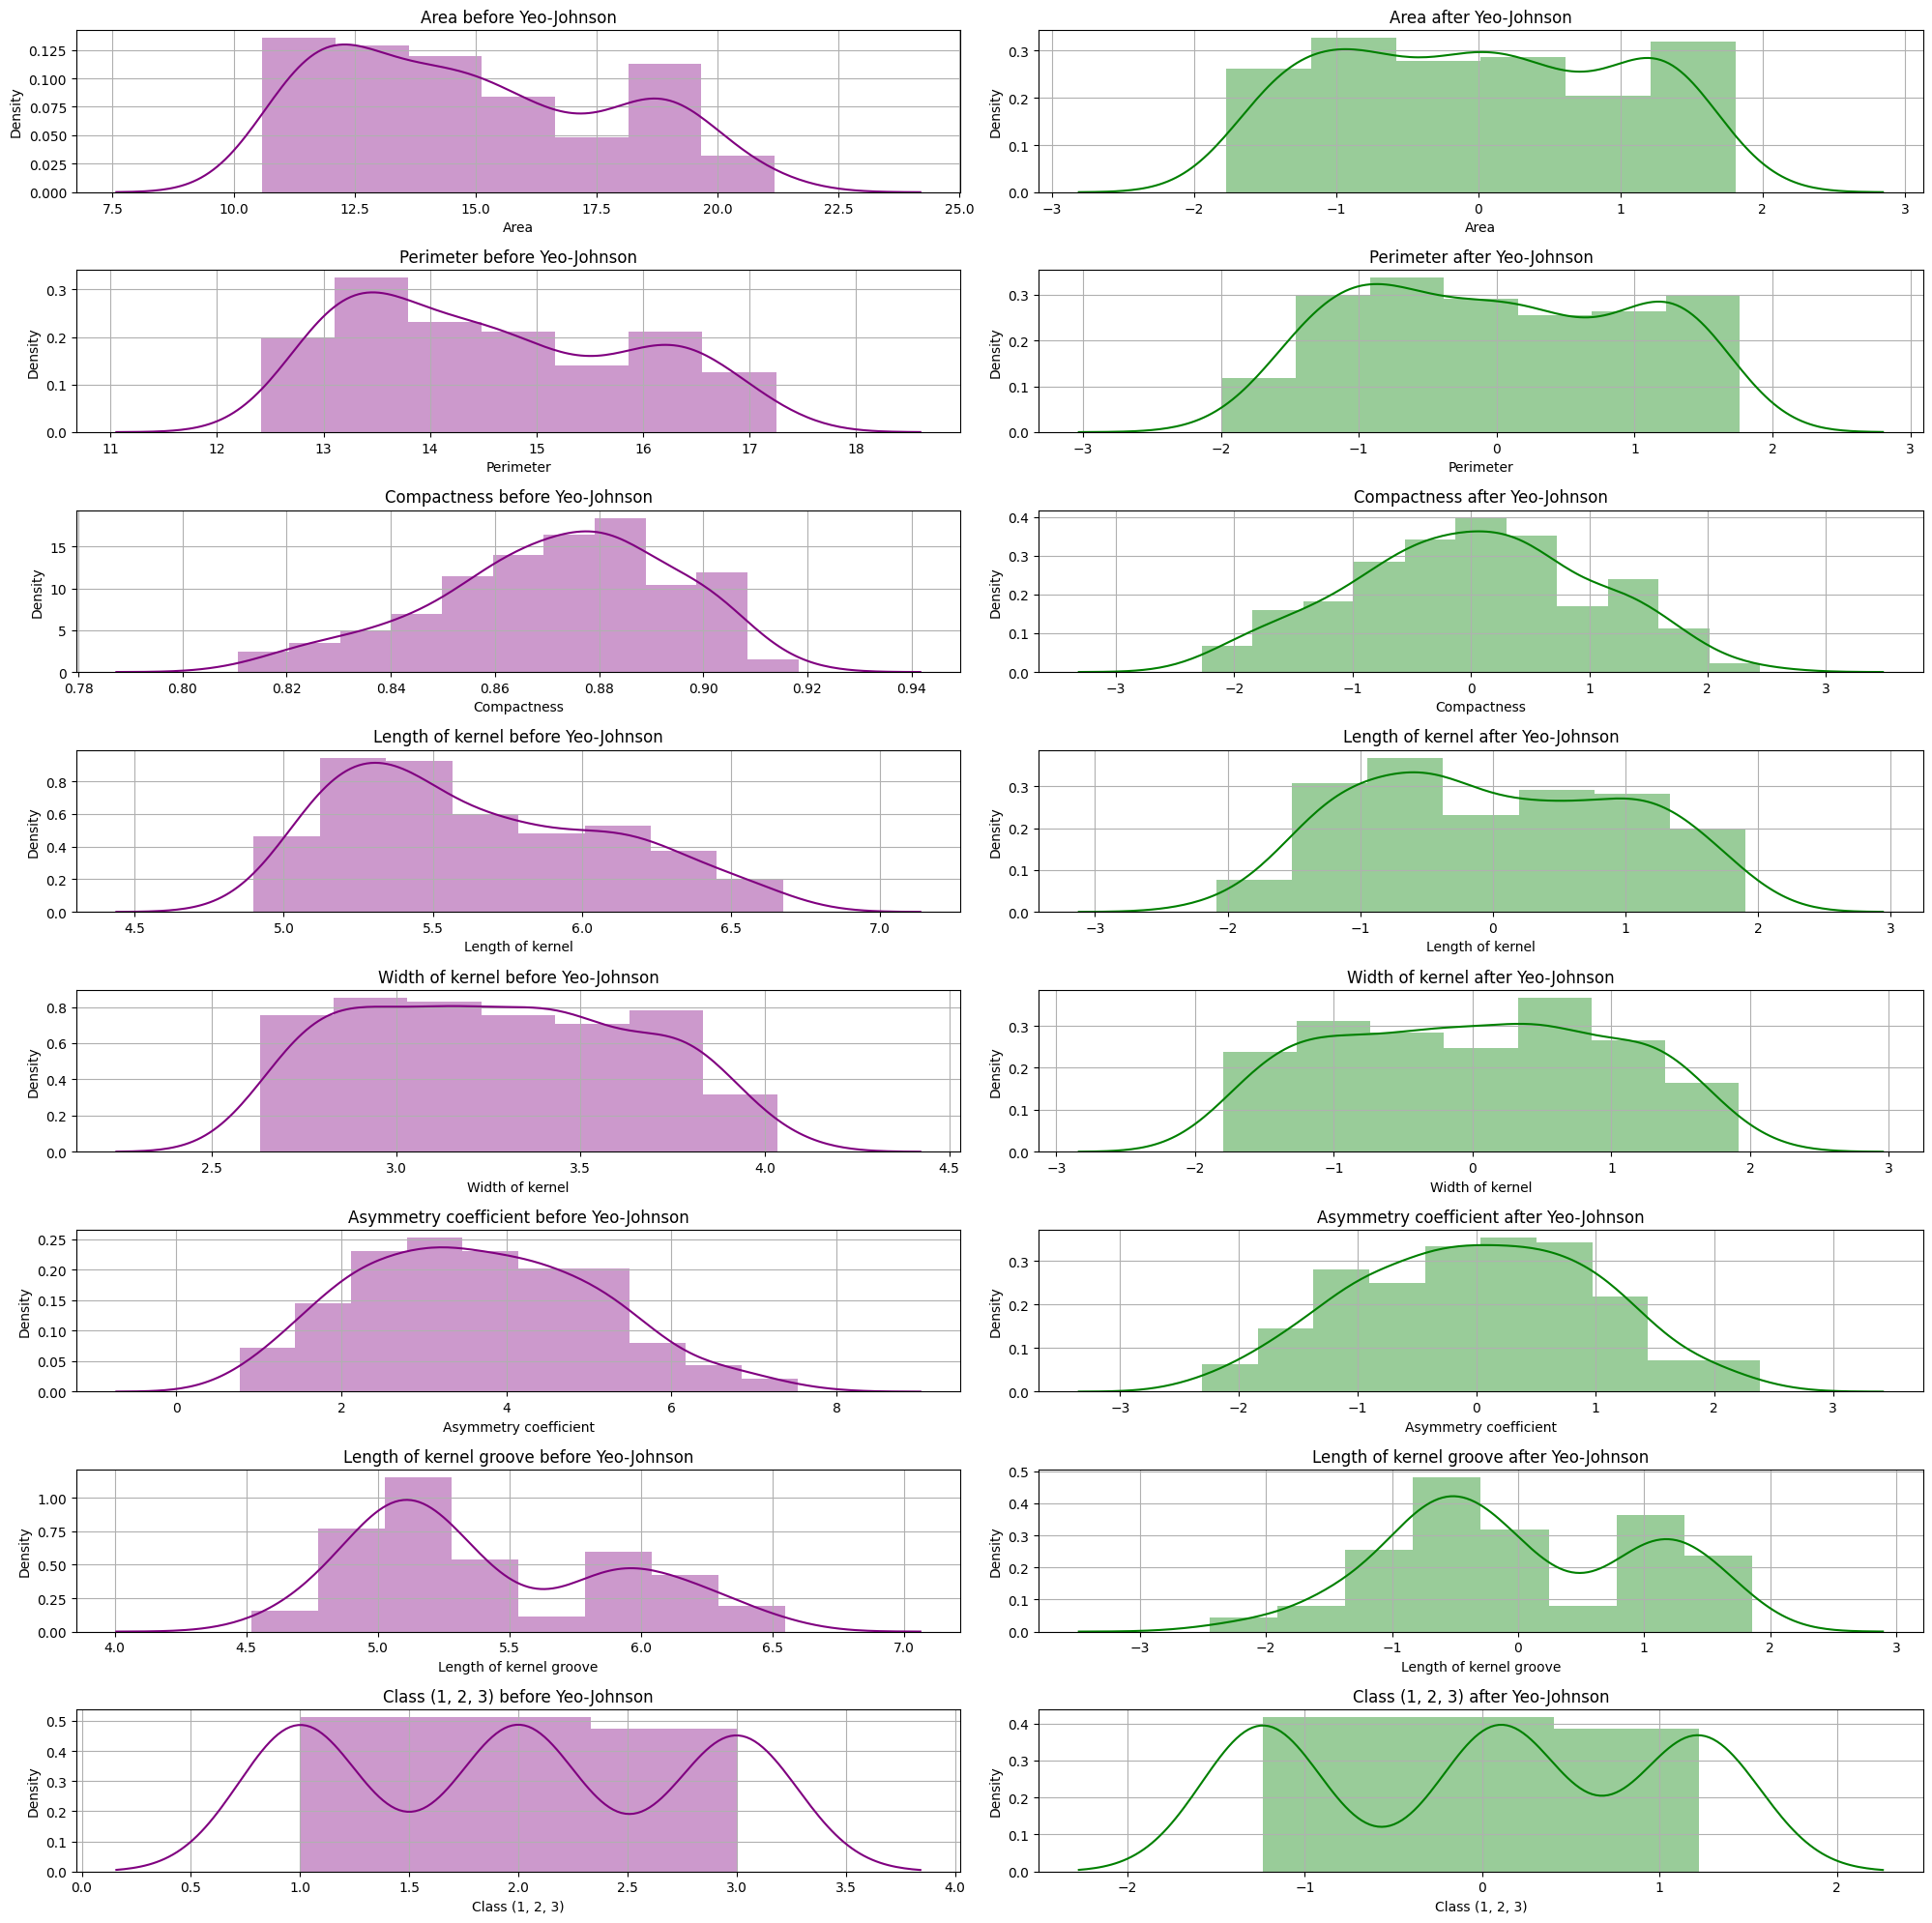

In [188]:

pt = PowerTransformer(method='yeo-johnson')
df_transformed = pd.DataFrame(pt.fit_transform(df), columns=df.columns)

# Plot the distribution of features before and after Yeo-Johnson transformation side by side
plt.figure(figsize=(20, 20))
for i, column in enumerate(df.columns, 1):
    plt.subplot(len(df.columns), 2, 2*i-1)
    sns.distplot(df[column],color='purple')
    plt.grid()
    plt.title(f'{column} before Yeo-Johnson')

    plt.subplot(len(df.columns), 2, 2*i)
    sns.distplot(df_transformed[column],color='green')
    plt.grid()
    plt.title(f'{column} after Yeo-Johnson')

plt.tight_layout()
plt.show()
